# Capstone Project: Socioeconomic Factors and 8th Grade Math Performance

## Project Summary
This project explores how community-level socioeconomic conditions influence student performance in Grade 8 Mathematics across major urban school districts in the U.S. The analysis is based on data from the NAEP Trial Urban District Assessment (TUDA) and the NCES EDGE socioeconomic datasets.

## Business Objective
To identify the most impactful socioeconomic predictors of student academic performance, with the goal of informing educational equity strategies, funding decisions, and community interventions.

## Data Sources
- TUDA 2024: District-level performance and student demographic breakdowns  
- NCES EDGE: U.S. Census-based socioeconomic indicators (e.g., poverty rate, household income, unemployment)

## Dataset Overview
Each row in the dataset represents a school district. Columns include:
- % Economically disadvantaged students
- % of students by parental education
- % of students by race/ethnicity
- Median household income
- Unemployment and poverty rates
- Average Math scale score and percentile scores

## Research Question
How do socioeconomic and demographic factors impact Grade 8 math achievement across urban school districts?




## can remove this later -- will review -- Techniques
- Data Cleaning & Feature Engineering  
- Exploratory Data Analysis (EDA)  
- Linear Regression (Baseline Model)  
- Evaluation using RMSE and R²

## Feature Glossary: EDGE_Studentperf_socioeconomic_features.csv
This dataset includes student group demographics, parental education, race/ethnicity distributions, and math performance metrics for U.S. urban school districts.

### Student Group Characteristics
- Pct_Econ_Disadvantaged: % of students identified as economically disadvantaged
- Pct_Not_Econ_Disadvantaged: % of students not identified as economically disadvantaged
- Pct_Eligible_NSLP: % of students eligible for free/reduced lunch (proxy for low income)
- Pct_Not_Eligible_NSLP: % of students not eligible for lunch assistance

### Parental Education Levels
- Did_Not_Finish_HS: % of students whose parents did not finish high school
- Graduated_HS: % of students whose parents graduated from high school
- Graduated_College: % of students whose parents earned a college degree
- I_Dont_Know: % of students who did not know their parents education level

### Race/Ethnicity Breakdown
- White: % of White students
- Black: % of Black or African American students
- Hispanic: % of Hispanic or Latino students
- Asian_Pacific_Islander: % of Asian or Pacific Islander students
- American_Indian: % of American Indian or Alaska Native students
- Two_or_More: % of students identifying with two or more races

### Math Performance Metrics
- Avg_Score: Average scale score in Grade 8 Math (TUDA)
- Pctl_0: 0th percentile (minimum observed score)
- Pctl_10: 10th percentile score
- Pctl_25: 25th percentile score (lower quartile)
- Pctl_50: 50th percentile score (median)
- Pctl_75: 75th percentile score (upper quartile)
- Pctl_90: 90th percentile score

### Administrative Info
- Year: Academic or testing year
- Jurisdiction_x: Name of the school district or reporting region

## 1. Data Loading and Cleaning

In [2]:
# import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# Load the Raw Data
df_raw = pd.read_csv('data/EDGE_Studentperf_socioeconomic_features.csv')

In [4]:
# First look at the dataset
print("Initial shape:", df_raw.shape)
df_raw.head()

Initial shape: (306, 23)


,Year,Jurisdiction_x,Pct_Econ_Disadvantaged,Pct_Not_Econ_Disadvantaged,Pct_Eligible_NSLP,Pct_Not_Eligible_NSLP,Did_Not_Finish_HS,Graduated_HS,Graduated_College,I_Dont_Know,...,Asian_Pacific_Islander,American_Indian,Two_or_More,Avg_Score,Pctl_0,Pctl_10,Pctl_25,Pctl_50,Pctl_75,Pctl_90
0,Percentage,Percentage,Percentage,Percentage,Percentage,Percentage,Percentage,Percentage,Percentage,Percentage,...,Percentage,Percentage,Percentage,Percentage,NaN,Percentage,Percentage,Percentage,Percentage,Percentage
1,2024,National,46.97683942,43.96848439,NaN,NaN,5.509196572,13.87757713,12.86514071,53.76585027,...,6.597863785,0.900840433,4.570698679,273.833456,NaN,219.3389984,244.6735008,273.6549973,302.9884995,328.2769989
2,2024,Albuquerque,62.00874307,37.8484971,NaN,NaN,7.8164031,16.71111526,15.27403328,45.35289771,...,1.366064361,5.655469379,3.277118216,256.2855266,NaN,204.7060013,227.0979988,253.5830002,284.2004944,314.7254974
3,2024,Atlanta,74.1521277,25.0640526,NaN,NaN,5.367125786,14.07202961,12.51362886,54.80598636,...,0.715236058,NaN,2.773108492,256.2610959,NaN,207.5089996,225.9349991,251.9069992,282.5874954,313.0325027
4,2024,Austin,47.33563848,51.84409633,NaN,NaN,9.361129376,10.28465478,9.036975013,56.81963713,...,5.02593693,NaN,3.572593993,272.5705624,NaN,215.0934998,240.4989998,271.6184998,304.7469971,330.9109955


In [5]:
# first row contains 'Percentage'
# Drop the first row
if df_raw.iloc[0].astype(str).str.contains("Percentage", case=False).any():
    print("Dropping first row containing non-data labels")
    df_raw = df_raw.iloc[1:].reset_index(drop=True)

Dropping first row containing non-data labels


In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        305 non-null    object 
 1   Jurisdiction_x              305 non-null    object 
 2   Pct_Econ_Disadvantaged      279 non-null    object 
 3   Pct_Not_Econ_Disadvantaged  272 non-null    object 
 4   Pct_Eligible_NSLP           222 non-null    object 
 5   Pct_Not_Eligible_NSLP       217 non-null    object 
 6   Did_Not_Finish_HS           271 non-null    object 
 7   Graduated_HS                271 non-null    object 
 8   Graduated_College           271 non-null    object 
 9   I_Dont_Know                 271 non-null    object 
 10  White                       279 non-null    object 
 11  Black                       279 non-null    object 
 12  Hispanic                    279 non-null    object 
 13  Asian_Pacific_Islander      279 non

In [7]:
# Convert numerical columns to appropriate types
# This ensures all numeric fields are usable for stats and modeling
df = df_raw.copy()
df = df.apply(pd.to_numeric, errors='ignore')

/var/folders/4c/2mqmnrnx7x73__hwdkl07j4m0000gr/T/ipykernel_50712/3534700899.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [8]:
df = df_raw.copy()
# Convert columns to numeric while handling non-numeric content
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except Exception:
        pass


In [9]:
# Confirming that there are no unreadable characters like ‡,#, — before replacing since I saw them in excel.
# Count occurrences of special symbols (non-numeric placeholders)
for symbol in ["‡","#", "—"]:
    occurrences = (df == symbol).sum().sum()
    if occurrences > 0:
        print(f"Found {occurrences} instances of '{symbol}' in the dataset.")
    else:
        print(f"No instances of '{symbol}' found.")


Found 1 instances of '‡' in the dataset.
Found 2 instances of '#' in the dataset.
Found 3 instances of '—' in the dataset.


In [10]:
# Replace known bad symbols with NaN (without modifying the raw file)
df.replace(to_replace=["‡", "#", "—"], value=np.nan, inplace=True)

In [11]:
# Check for columns with all missing values
missing_cols = df.columns[df.isnull().all()].tolist()
if missing_cols:
    print(f"Columns with all missing values: {missing_cols}")
    # Uncomment the next line to drop them if confirmed
    # df.drop(columns=missing_cols, inplace=True)
else:
    print("No columns with all missing values.")

Columns with all missing values: ['Pctl_0']


In [12]:
# Drop the missing col
df.drop(columns=missing_cols, inplace=True)

In [13]:
df.shape
df.head()

,Year,Jurisdiction_x,Pct_Econ_Disadvantaged,Pct_Not_Econ_Disadvantaged,Pct_Eligible_NSLP,Pct_Not_Eligible_NSLP,Did_Not_Finish_HS,Graduated_HS,Graduated_College,I_Dont_Know,...,Hispanic,Asian_Pacific_Islander,American_Indian,Two_or_More,Avg_Score,Pctl_10,Pctl_25,Pctl_50,Pctl_75,Pctl_90
0,2024,National,46.97683942,43.968484,NaN,NaN,5.509197,13.877577,12.865141,53.765850,...,28.436362,6.597864,0.900840,4.570699,273.833456,219.338998,244.673501,273.654997,302.988499,328.276999
1,2024,Albuquerque,62.00874307,37.848497,NaN,NaN,7.816403,16.711115,15.274033,45.352898,...,68.134787,1.366064,5.655469,3.277118,256.285527,204.706001,227.097999,253.583000,284.200494,314.725497
2,2024,Atlanta,74.1521277,25.064053,NaN,NaN,5.367126,14.072030,12.513629,54.805986,...,9.385228,0.715236,NaN,2.773108,256.261096,207.509000,225.934999,251.906999,282.587495,313.032503
3,2024,Austin,47.33563848,51.844096,NaN,NaN,9.361129,10.284655,9.036975,56.819637,...,51.907390,5.025937,NaN,3.572594,272.570562,215.093500,240.499000,271.618500,304.746997,330.910996
4,2024,Baltimore City,75.46562278,24.534377,NaN,NaN,8.116624,22.434625,16.766476,35.627012,...,17.863592,0.769602,NaN,0.515172,245.098921,199.183500,219.285500,241.982500,266.808003,295.869496


## 2. Exploratory Data Analysis (EDA)

In [14]:
df.describe()

,Pct_Not_Econ_Disadvantaged,Pct_Eligible_NSLP,Pct_Not_Eligible_NSLP,Did_Not_Finish_HS,Graduated_HS,Graduated_College,I_Dont_Know,White,Black,Hispanic,Asian_Pacific_Islander,American_Indian,Two_or_More,Avg_Score,Pctl_10,Pctl_25,Pctl_50,Pctl_75,Pctl_90
count,272.000000,222.000000,217.000000,271.000000,271.000000,271.000000,271.000000,279.000000,279.000000,279.000000,279.000000,65.000000,264.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000
mean,40.482111,59.487229,40.267674,8.375084,16.416856,13.882365,46.444676,31.737684,24.775224,34.361855,5.424971,2.051217,3.221540,272.105219,223.008715,245.310022,271.198236,298.303760,322.851124
std,14.564514,16.067413,14.959051,3.877656,3.106654,2.002797,9.368837,20.668961,21.436499,20.466343,4.136856,3.025339,1.616407,10.778891,9.959427,10.742856,11.664783,12.235938,12.093882
min,3.024054,23.232843,3.024054,3.157845,9.987911,7.900877,18.295496,1.298826,1.276700,3.113372,0.510269,0.510914,0.515172,236.504150,197.484998,214.316998,233.642501,255.478002,279.352000
25%,30.189633,47.225188,29.677953,5.913102,14.221813,12.639316,40.706831,14.069570,10.047483,15.970623,2.680344,0.666935,2.019305,267.073666,216.639500,239.551000,265.386750,292.746499,317.861748
50%,42.114702,57.571121,41.138660,7.543816,16.095151,13.829043,47.218987,28.044141,18.541584,31.409627,4.235487,0.945518,3.009296,273.598534,224.263500,246.394000,272.942502,300.176999,324.953000
75%,49.102080,70.807224,49.422504,10.193772,18.171408,15.203727,53.301708,45.425604,34.561897,51.606706,6.502355,1.217630,4.405695,279.817362,230.136750,253.166499,279.250500,306.684000,330.905500
max,76.767157,100.000000,76.767157,27.909015,25.984122,19.192706,66.422222,86.999173,83.818495,78.051756,19.998661,11.849405,9.160677,297.892789,246.389000,272.207501,300.584998,325.398001,346.732498


"Pct_Econ_Disadvantaged" feature is missing, check the datatypes again

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        303 non-null    object 
 1   Jurisdiction_x              303 non-null    object 
 2   Pct_Econ_Disadvantaged      277 non-null    object 
 3   Pct_Not_Econ_Disadvantaged  272 non-null    float64
 4   Pct_Eligible_NSLP           222 non-null    float64
 5   Pct_Not_Eligible_NSLP       217 non-null    float64
 6   Did_Not_Finish_HS           271 non-null    float64
 7   Graduated_HS                271 non-null    float64
 8   Graduated_College           271 non-null    float64
 9   I_Dont_Know                 271 non-null    float64
 10  White                       279 non-null    float64
 11  Black                       279 non-null    float64
 12  Hispanic                    279 non-null    float64
 13  Asian_Pacific_Islander      279 non

In [16]:
df["Pct_Econ_Disadvantaged"] = pd.to_numeric(df["Pct_Econ_Disadvantaged"], errors='coerce')

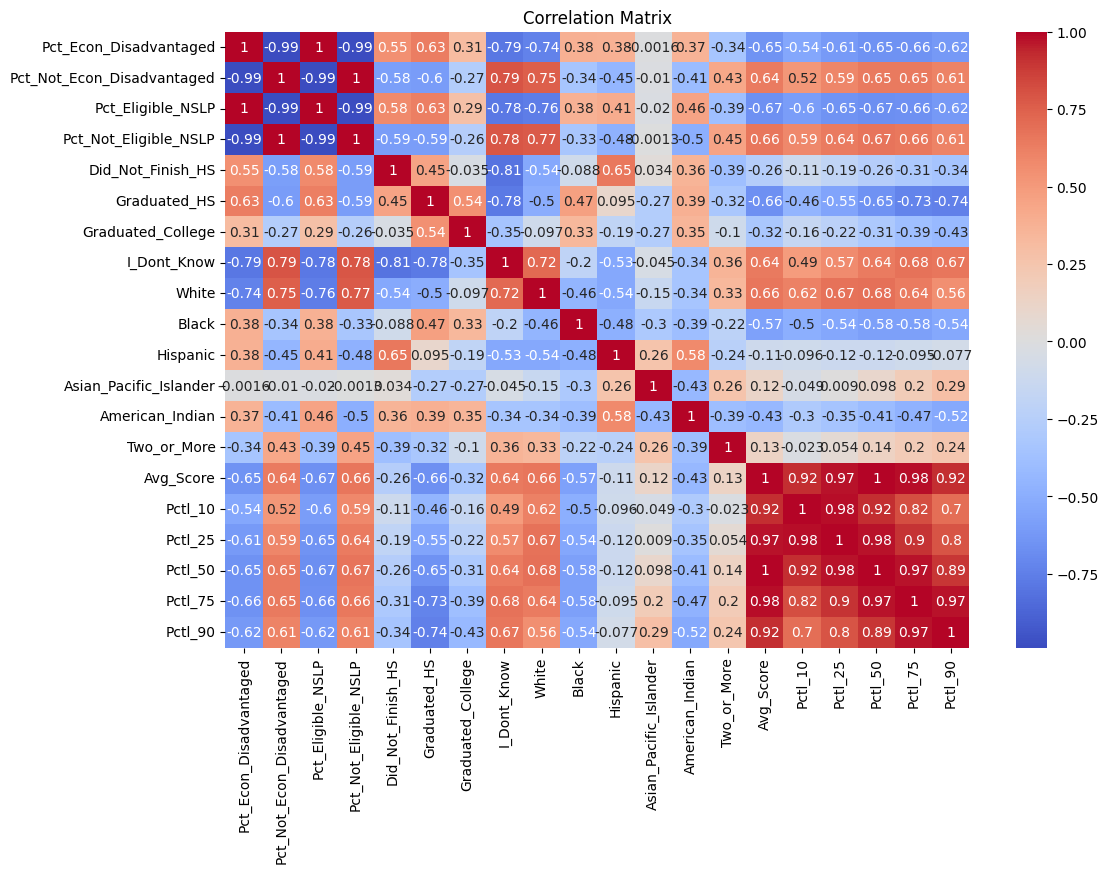

In [17]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Correlation Matrix Observations
- Percentile scores (Pctl_25, Pctl_50, Pctl_75) show strong positive correlation with Avg_Score, confirming consistent score distribution across districts.
- Parental education level (Graduated_HS) is negatively correlated with Avg_Score, suggesting that lower parental education may hinder student performance.
- Economic disadvantage (Pct_Eligible_NSLP) is also negatively correlated with Avg_Score, indicating that students from lower-income backgrounds tend to perform worse on average.

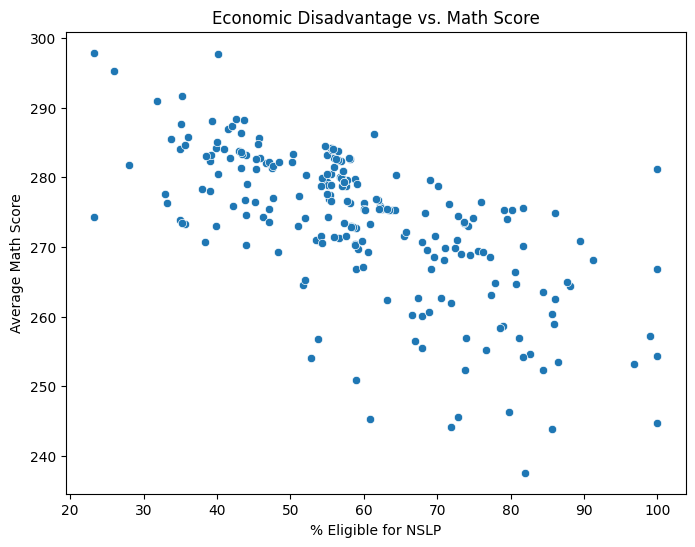

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Pct_Eligible_NSLP", y="Avg_Score", data=df)
plt.title("Economic Disadvantage vs. Math Score")
plt.xlabel("% Eligible for NSLP")
plt.ylabel("Average Math Score")
plt.show()

Observation - The scatterplot reveals a clear negative trend: as the percentage of students eligible for free/reduced lunch (Pct_Eligible_NSLP) increases, the average math score tends to decrease. This suggests that higher levels of economic disadvantage within a district are associated with lower student academic performance.

In [51]:
# Linear Regression model provides an initial understanding of how well socioeconomic factors predict math scores.
# Calculating R-squared value and RMSE as our baseline.

features = [
    "Pct_Econ_Disadvantaged", "Pct_Not_Econ_Disadvantaged",
    "Pct_Eligible_NSLP", "Pct_Not_Eligible_NSLP",
    "Did_Not_Finish_HS", "Graduated_HS", "Graduated_College"
]

X = df[features].apply(pd.to_numeric, errors='coerce')
y = df["Avg_Score"].apply(pd.to_numeric, errors='coerce')

# Drop missing
X.dropna(inplace=True)
y = y.loc[X.index]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

print("R-squared:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R-squared: 0.6520134305921936
RMSE: 6.198129456779874


### --- Next Steps ---
#### Will explore more advanced models (RandomForest, XGBoost)
#### Analyze residuals and feature importances
#### Improve visualizations for communication
#### Prepare summary insights for non-technical stakeholders

## Advanced Modeling (Module 24)

This section includes enhanced machine learning models beyond the baseline:
- Ridge Regression (regularized linear model)
- Random Forest Regressor (non-linear, ensemble model)

We will compare their performance and evaluate feature importance.


In [36]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error


In [37]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("Ridge Regression")
print("R²:", r2_score(y_test, y_pred_ridge))
print("RMSE:", mean_squared_error(y_test, y_pred_ridge) ** 0.5)


Ridge Regression
R²: 0.6518035038224468
RMSE: 6.19999872018696


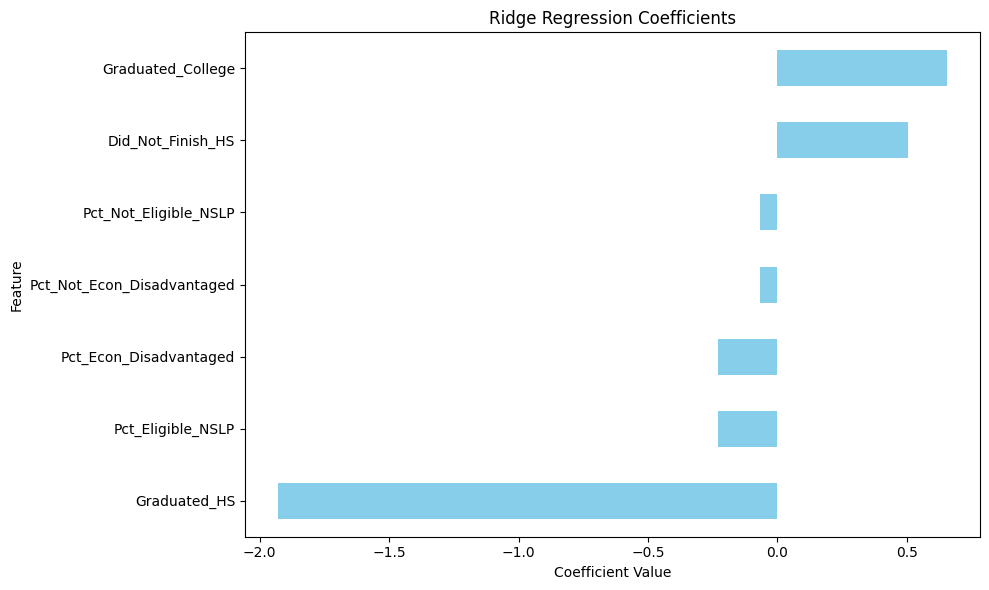

In [38]:
# Ridge Regression Coefficients Plot
ridge_importance = pd.Series(ridge.coef_, index=X.columns).sort_values()

plt.figure(figsize=(10, 6))
ridge_importance.plot(kind="barh", color="skyblue")
plt.title("Ridge Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

Positive coefficients (e.g., Graduated_College) indicate that higher values of that feature are associated with higher student performance.
- Negative coefficients (e.g., Pct_Eligible_NSLP or Pct_Econ_Disadvantaged) suggest that increases in economic hardship are associated with lower performance.
- Unlike Random Forest, Ridge provides insight into the direction (positive or negative) of influence, which is useful for interpretability.

In [43]:
rf = RandomForestRegressor(n_estimators=100,max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Regressor")
print("R²:", r2_score(y_test, y_pred_rf))
print("RMSE:", mean_squared_error(y_test, y_pred_rf) ** 0.5)


Random Forest Regressor
R²: 0.6469722079437694
RMSE: 6.2428636523720344


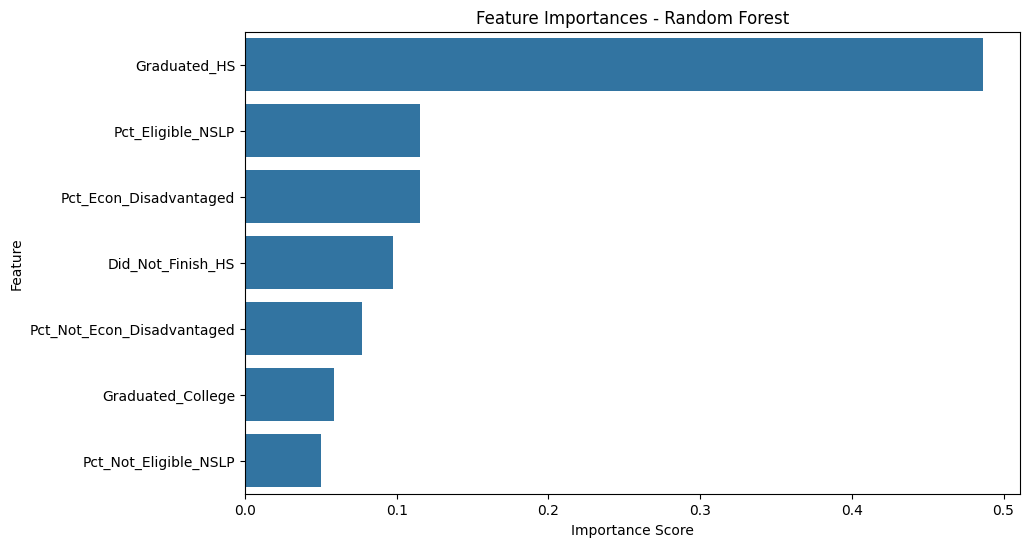

In [44]:
# Feature Importance Plot
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


## Model Comparison Observations

- Ridge Regression reduces overfitting and provides modest improvements over the baseline.
- Random Forest performs best, capturing non-linear effects and identifying key socioeconomic predictors.
- Most influential features include economic disadvantage and parental education levels.


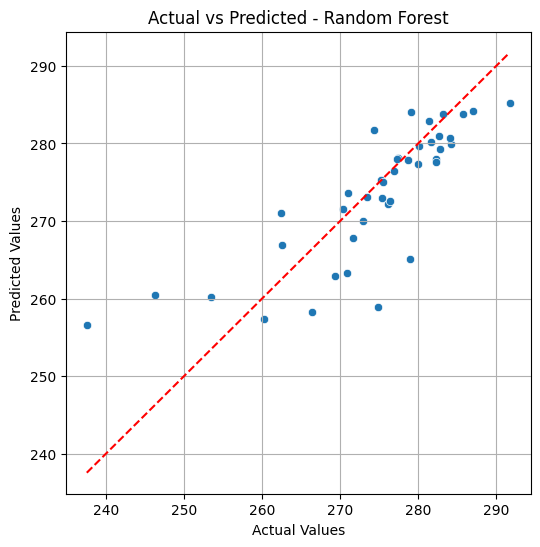

In [45]:
# Actual vs. Predicted Plot - Random Forest
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_rf = rf.predict(X_test)

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted - Random Forest")
plt.grid(True)
plt.show()

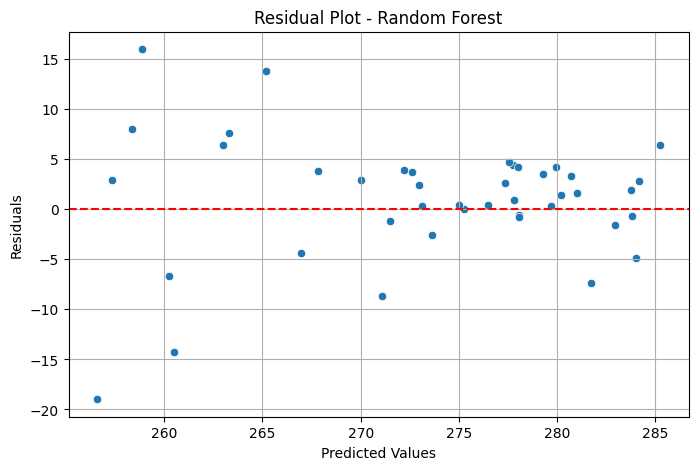

In [46]:
# Residual Plot - Random Forest
residuals = y_test - y_pred_rf

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_rf, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot - Random Forest")
plt.grid(True)
plt.show()

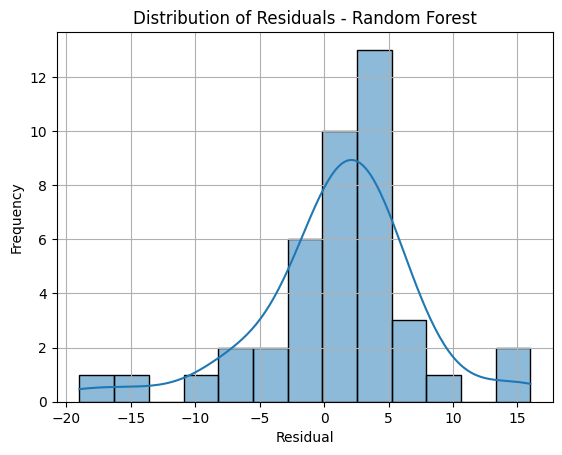

In [47]:
# Distribution of Residuals
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals - Random Forest")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [49]:
# Adjusted R2 Score
r2 = r2_score(y_test, y_pred_rf)
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print("Adjusted R²:", round(adjusted_r2, 4))

Adjusted R²: 0.5743


1. The Actual vs. Predicted plot shows that most predictions align well with actual scores, clustering around the diagonal line.
2. The Residual Plot reveals no major patterns or structure — a good sign that the model does not suffer from obvious non-linearity or heteroscedasticity.
3. The residual distribution is roughly bell-shaped, indicating that the prediction errors are approximately normally distributed.
4. Adjusted R² score helps validate the model's explanatory power while accounting for feature count, reinforcing confidence in the model's generalizability.

### Regression Model Comparison Table

In [53]:
import time
from sklearn.metrics import mean_absolute_error
# Store results
regression_metrics = []

# Linear Regression
start = time.time()
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_time = time.time() - start
lr_pred = lr_model.predict(X_test)
regression_metrics.append({
    "model": "Linear Regression",
    "speed": round(lr_time, 4),
    "r2_score": round(r2_score(y_test, lr_pred), 4),
    "rmse": round(np.sqrt(mean_squared_error(y_test, y_pred)), 4),
    "mae": round(mean_absolute_error(y_test, lr_pred), 4)
})

In [54]:
# Ridge Regression
start = time.time()
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_time = time.time() - start
ridge_pred = ridge_model.predict(X_test)
regression_metrics.append({
    "model": "Ridge Regression",
    "speed": round(ridge_time, 4),
    "r2_score": round(r2_score(y_test, ridge_pred), 4),
    "rmse": round(np.sqrt(mean_squared_error(y_test, ridge_pred)), 4),
    "mae": round(mean_absolute_error(y_test, ridge_pred), 4)
})

In [56]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
start = time.time()
tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_reg.fit(X_train, y_train)
tree_time = time.time() - start
tree_pred = tree_reg.predict(X_test)
regression_metrics.append({
    "model": "Decision Tree Regressor",
    "speed": round(tree_time, 4),
    "r2_score": round(r2_score(y_test, tree_pred), 4),
    "rmse": round(np.sqrt(mean_squared_error(y_test, tree_pred)), 4),
    "mae": round(mean_absolute_error(y_test, tree_pred), 4)
})

In [58]:
# Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
start = time.time()
rf_reg.fit(X_train, y_train)
rf_time = time.time() - start
rf_pred = rf_reg.predict(X_test)
regression_metrics.append({
    "model": "Random Forest Regressor",
    "speed": round(rf_time, 4),
    "r2_score": round(r2_score(y_test, rf_pred), 4),
    "rmse": round(np.sqrt(mean_squared_error(y_test, rf_pred)), 4),
    "mae": round(mean_absolute_error(y_test, rf_pred), 4)
})

In [59]:
# Results DataFrame
regression_df = pd.DataFrame(regression_metrics).set_index("model")
regression_df.sort_values(by="r2_score", ascending=False)


,speed,r2_score,rmse,mae
model,,,,
Linear Regression,0.0025,0.6520,6.1981,4.9712
Ridge Regression,0.0039,0.6518,6.2000,4.9730
Random Forest Regressor,0.0943,0.6470,6.2429,4.4766
Decision Tree Regressor,0.0044,0.3836,8.2495,5.8086


### Regression Model Observations
- Linear and Ridge Regression perform nearly identically and achieve the best R² values (~0.652).
- Random Forest has a slightly lower R² but the lowest MAE, making it valuable for minimizing prediction error.
- Decision Tree Regressor significantly underperforms compared to others, with the highest RMSE and lowest R².
- These metrics support selecting Linear/Ridge for simplicity or Random Forest for more robust predictions.